

Did you know that there are more than 190,000 fast-food restaurants in the US?

These stores are interested in improving the daily predictions of their sales. They believe that calendar events, holidays and discounts have a high impact on the demand and are keen to know if they need to make changes to their inventory policies. Better predictions will help them fulfill more demand and reduce costs. 


In [6]:
# Run this cell to load the libraries and data
# Load required libraries: dplyr, gplot2
library(dplyr)
library(ggplot2)

# Load the data
train <- read.csv("export (2).csv")

In [8]:
# Calculate total sales per store
store_sales <- train %>%
  group_by(store_num) %>%
  summarise(total_sales = sum(sales_amt, na.rm = TRUE)) %>%
  arrange(desc(total_sales))

# Select top 10 stores with highest sales
top_10_stores <- head(store_sales, 10)

# Display the result
top_10_stores

store_num,total_sales
<int>,<dbl>
2564,4088.04
619,3933.67
587,3631.73
2497,3607.26
206,3352.36
417,3299.18
177,3225.59
2330,3222.65
72,3197.18


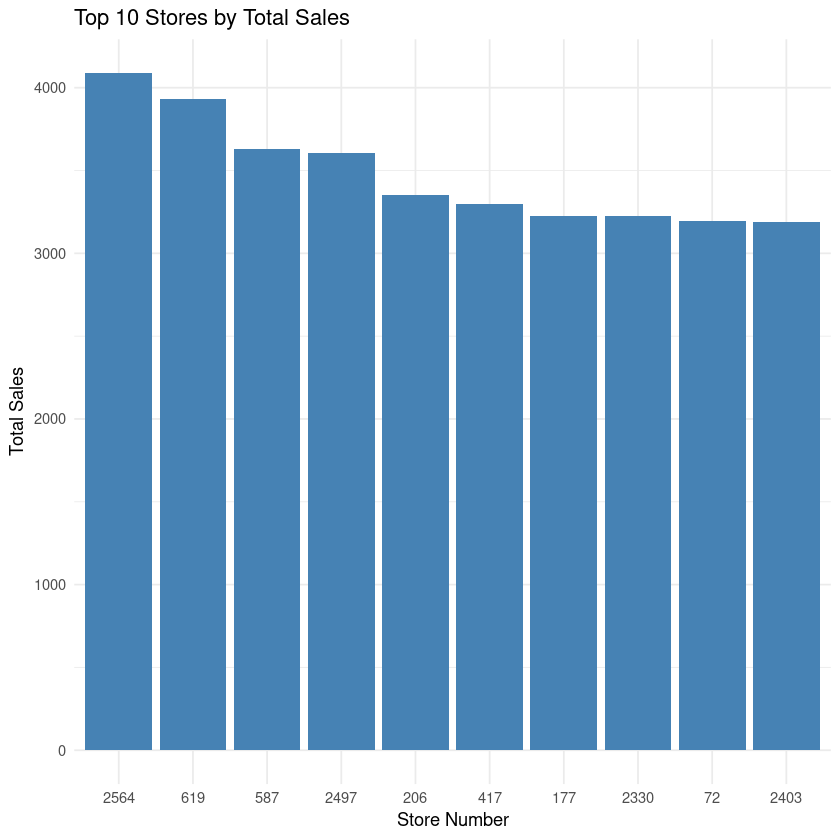

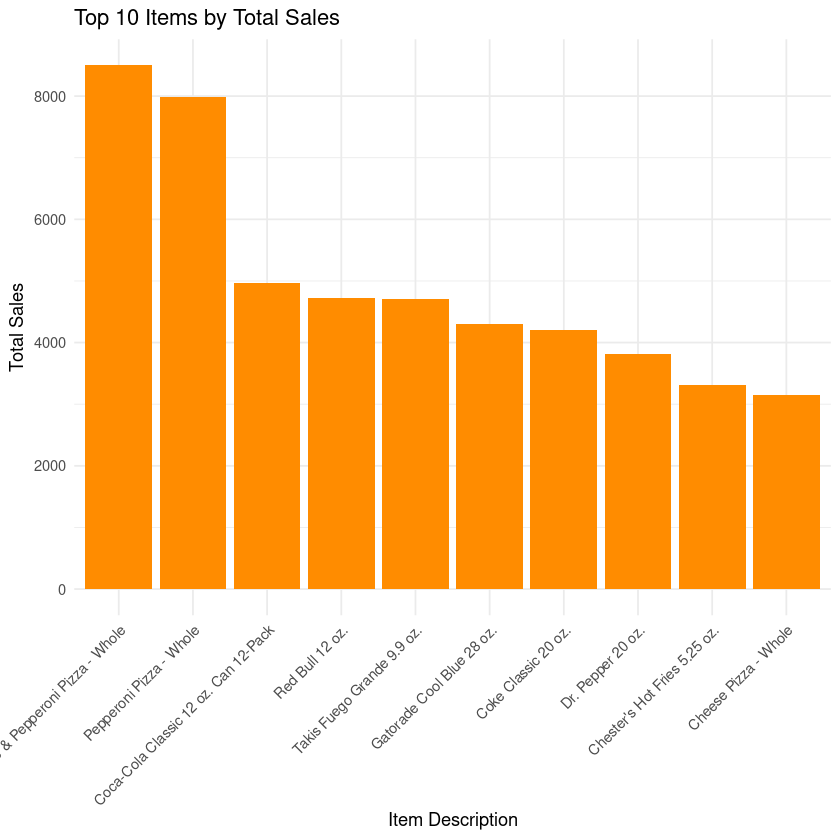

In [15]:
# Create a bar plot for the top 10 stores with the highest total sales
ggplot(top_10_stores, aes(x = reorder(store_num, -total_sales), y = total_sales)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Top 10 Stores by Total Sales",
       x = "Store Number",
       y = "Total Sales") +
  theme_minimal()

# Calculate total sales per item
item_sales <- train %>%
  group_by(item_desc) %>%
  summarise(total_sales = sum(sales_amt, na.rm = TRUE)) %>%
  arrange(desc(total_sales))

# Select top 10 items with highest sales
top_10_items <- head(item_sales, 10)

# Create a bar plot for the top 10 items with the highest total sales
ggplot(top_10_items, aes(x = reorder(item_desc, -total_sales), y = total_sales)) +
  geom_bar(stat = "identity", fill = "darkorange") +
  labs(title = "Top 10 Items by Total Sales",
       x = "Item Description",
       y = "Total Sales") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [18]:
install.packages("forecast")

# Downloading packages -------------------------------------------------------
- Downloading forecast from CRAN ...            OK [1.5 Mb in 0.93s]
- Downloading fracdiff from CRAN ...            OK [94.8 Kb in 0.54s]
- Downloading lmtest from CRAN ...              OK [389.6 Kb in 0.56s]
- Downloading tseries from CRAN ...             OK [364.5 Kb in 0.53s]
- Downloading quadprog from CRAN ...            OK [29.3 Kb in 0.45s]
- Downloading quantmod from CRAN ...            OK [1018.3 Kb in 0.43s]
- Downloading TTR from CRAN ...                 OK [504.3 Kb in 0.41s]
- Downloading urca from CRAN ...                OK [1 Mb in 0.41s]
- Downloading RcppArmadillo from CRAN ...       OK [1 Mb in 0.12s]
Successfully downloaded 9 packages in 6.6 seconds.

The following package(s) will be installed:
- forecast      [8.23.0]
- fracdiff      [1.5-3]
- lmtest        [0.9-40]
- quadprog      [1.5-8]
- quantmod      [0.4.26]
- RcppArmadillo [14.0.2-1]
- tseries       [0.10-58]
- TTR           [0.24

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


  Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
2        4088.04 4088.04 4088.04 4088.04 4088.04
3        4088.04 4088.04 4088.04 4088.04 4088.04

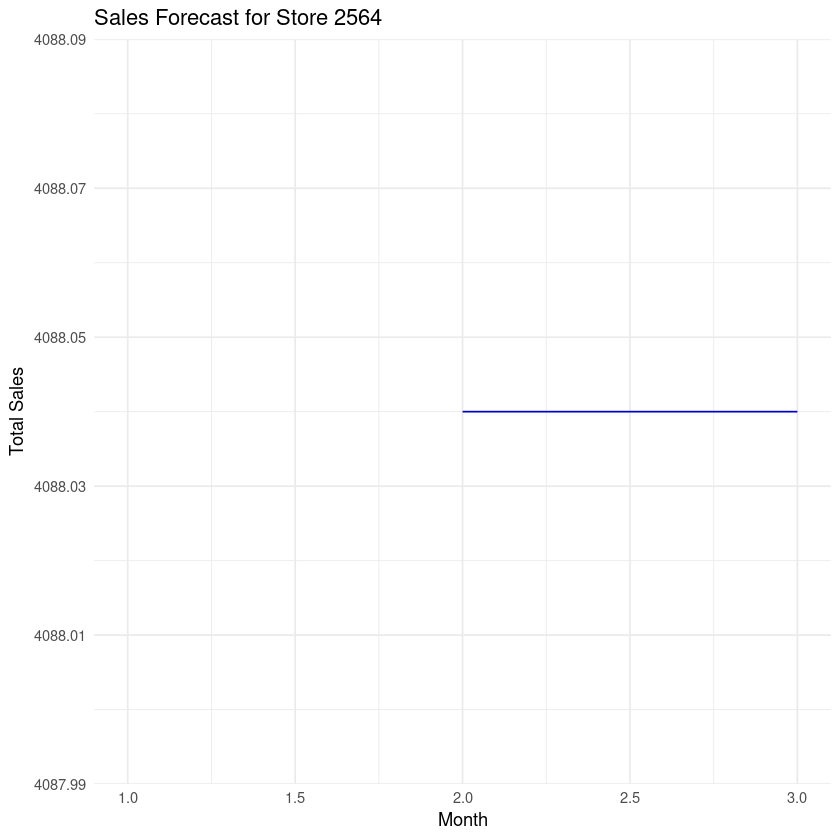

In [19]:
# 1. Installs the 'forecast' package, which is used for time series forecasting.
install.packages("forecast")

# 2. Loads necessary libraries: 'caret' for machine learning, 'lubridate' for date manipulation, and 'forecast' for time series forecasting.
library(caret)
library(lubridate)
library(forecast)

# 3. Filters the 'train' dataframe to include only data for store number 2564.
store_2564_data <- train %>%
  filter(store_num == 2564)

# 4. Converts the 'business_date' column to Date type.
store_2564_data$business_date <- as.Date(store_2564_data$business_date, format = "%Y-%m-%d")

# 5. Aggregates sales by month, creating a new dataframe 'monthly_sales' with columns 'month' and 'total_sales'.
monthly_sales <- store_2564_data %>%
  mutate(month = floor_date(business_date, "month")) %>%
  group_by(month) %>%
  summarise(total_sales = sum(sales_amt, na.rm = TRUE))

# 6. Creates a time series object 'ts_sales' from the 'total_sales' column of 'monthly_sales', starting from the earliest month in the data.
ts_sales <- ts(monthly_sales$total_sales, start = c(year(min(monthly_sales$month)), month(min(monthly_sales$month))), frequency = 12)

# 7. Splits the time series data into training and testing sets, with 80% of the data used for training.
train_size <- floor(0.8 * length(ts_sales))
train_ts <- ts_sales[1:train_size]
test_ts <- ts_sales[(train_size + 1):length(ts_sales)]

# 8. Fits an ARIMA model to the training data.
fit <- auto.arima(train_ts)

# 9. Forecasts the next two months of sales using the fitted ARIMA model.
forecasted_sales <- forecast(fit, h = 2)

# 10. Plots the forecasted sales along with the historical data.
autoplot(forecasted_sales) +
  labs(title = "Sales Forecast for Store 2564",
       x = "Month",
       y = "Total Sales") +
  theme_minimal()

# 11. Displays the forecasted values.
forecasted_sales

# A tibble: 401 × 5
   store_num total_sales average_sales median_sales sales_count
       <int>       <dbl>         <dbl>        <dbl>       <int>
 1        51       560.           4.59         3.69         122
 2        52       563.           3.68         2.99         153
 3        68       461.           4.61         3.29         100
 4        72      3197.           4.05         3.29         790
 5        73        45.7          5.71         4.99           8
 6        74       398.           4.42         3.29          90
 7        75       699.           4.63         3.29         151
 8        76       820.           4.61         3.29         178
 9        78      1069.           4.47         3.29         239
10        80      1292.           4.62         3.49         280
# ℹ 391 more rows


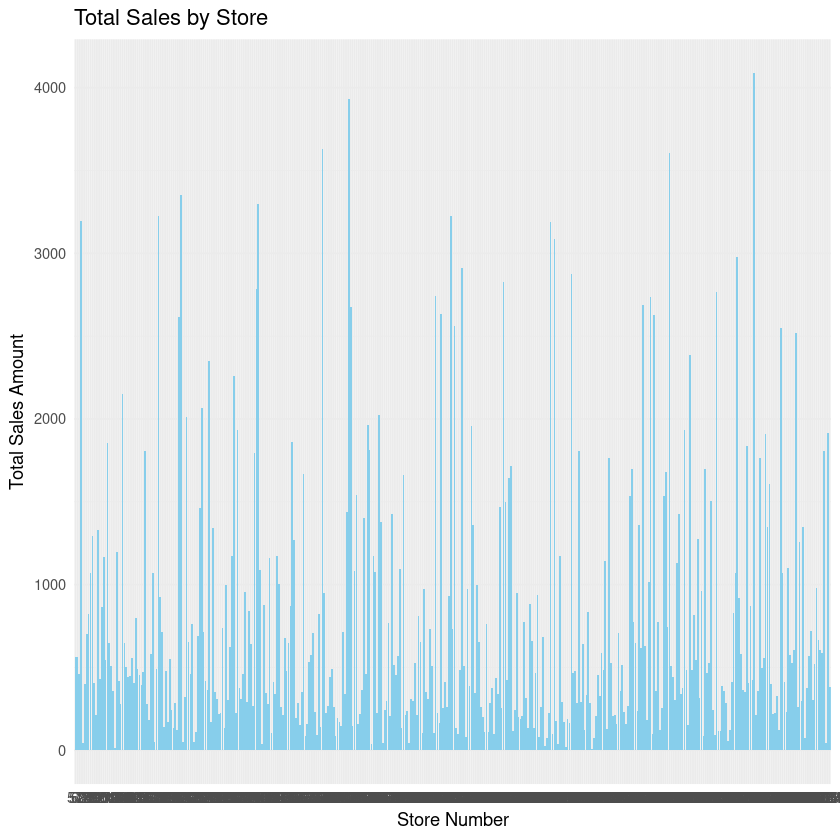

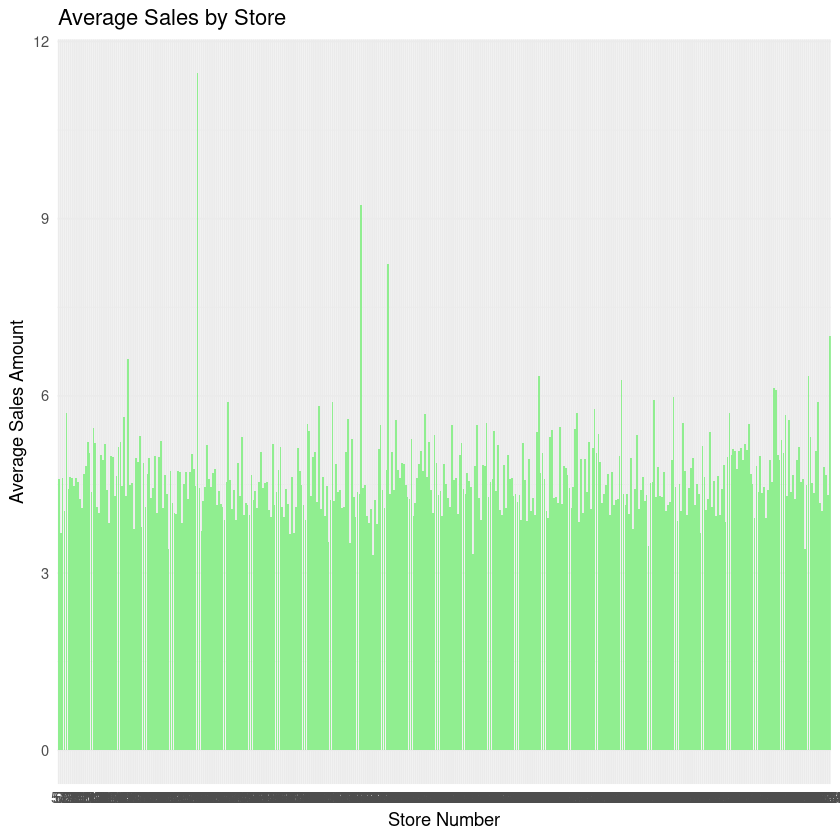

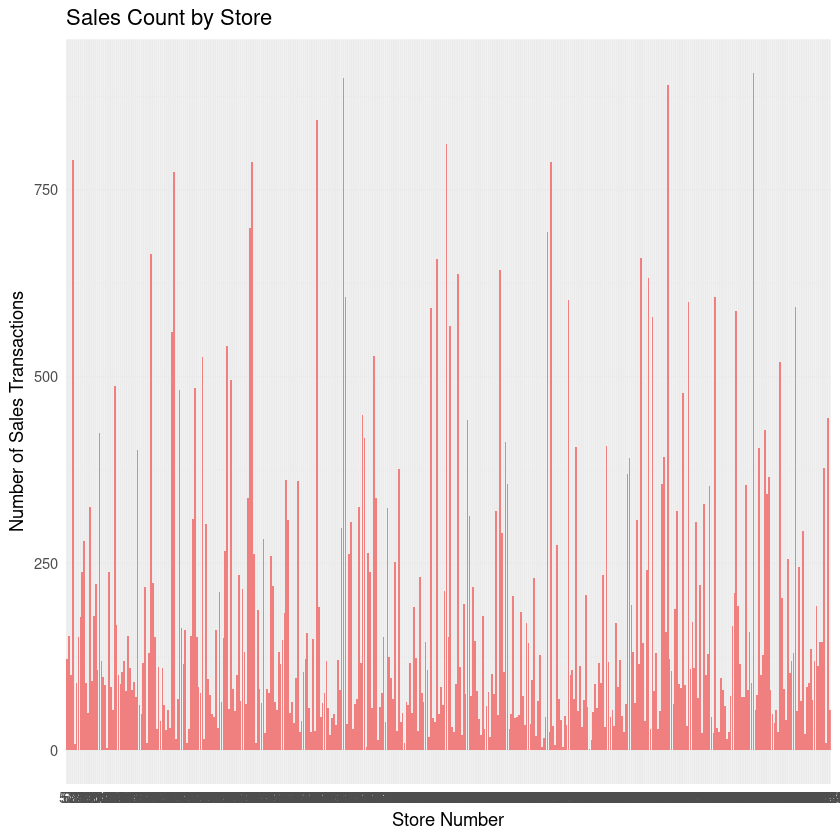

In [3]:
# Perform EDA to analyze the sales in each store

# Summary statistics for sales amount by store
store_sales_summary <- train %>%
  group_by(store_num) %>%
  summarise(
    total_sales = sum(sales_amt, na.rm = TRUE),
    average_sales = mean(sales_amt, na.rm = TRUE),
    median_sales = median(sales_amt, na.rm = TRUE),
    sales_count = n()
  )

# Display the summary statistics
print(store_sales_summary)

# Plot total sales by store
ggplot(store_sales_summary, aes(x = factor(store_num), y = total_sales)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Total Sales by Store", x = "Store Number", y = "Total Sales Amount") +
  theme_minimal()

# Plot average sales by store
ggplot(store_sales_summary, aes(x = factor(store_num), y = average_sales)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  labs(title = "Average Sales by Store", x = "Store Number", y = "Average Sales Amount") +
  theme_minimal()

# Plot sales count by store
ggplot(store_sales_summary, aes(x = factor(store_num), y = sales_count)) +
  geom_bar(stat = "identity", fill = "lightcoral") +
  labs(title = "Sales Count by Store", x = "Store Number", y = "Number of Sales Transactions") +
  theme_minimal()

In [20]:
# Feature engineering: Create new features based on existing data

# Convert business_date to Date type
train$business_date <- as.Date(train$business_date, format = "%Y-%m-%d")

# Extract year, month, and day from business_date
train <- train %>%
  mutate(
    year = as.integer(format(business_date, "%Y")),
    month = as.integer(format(business_date, "%m")),
    day = as.integer(format(business_date, "%d"))
  )

# Create a new feature: sales per unit
train <- train %>%
  mutate(sales_per_unit = sales_amt / selling_units)

# Create a new feature: total tax amount (sum of net and sales tax)
train <- train %>%
  mutate(total_tax_amt = total_tax_net_amt + total_tax_sales_amt)

# Create a new feature: discount amount (difference between gross and net amount)
train <- train %>%
  mutate(discount_amt = total_gross_amt - total_net_amt)

# Create a new feature: day of the week
train <- train %>%
  mutate(day_of_week = weekdays(business_date))

# Create a new feature: is_weekend (TRUE if the day is Saturday or Sunday)
train <- train %>%
  mutate(is_weekend = day_of_week %in% c("Saturday", "Sunday"))

# Display the first few rows of the updated dataframe to verify the new features
head(train)

,txn_key,txn_id,src_txn_id,store_num,store_banner,business_date,item_upc_key,item_key,sales_amt,sales_qty,⋯,detail_line_num,store_key,year,month,day,sales_per_unit,total_tax_amt,discount_amt,day_of_week,is_weekend
,<chr>,<dbl>,<chr>,<int>,<chr>,<date>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,5eae1459ed7930019084ca8a62f0ac61,38021500,5EAE1459-ED79-3001-9084-CA8A62F0AC61,2564,RaceTrac,2024-08-23,28766,28122,2.79,1,⋯,1,2410,2024,8,23,2.79,1.50,-0.75,Friday,FALSE
2,5eae1459ed7930019084ca8a62f0ac61,38021500,5EAE1459-ED79-3001-9084-CA8A62F0AC61,2564,RaceTrac,2024-08-23,28640,13608,5.38,2,⋯,2,2410,2024,8,23,5.38,1.50,-0.75,Friday,FALSE
3,640b85d1685d3001a23d3366ee97037d,49645596,640B85D1-685D-3001-A23D-3366EE97037D,659,RaceTrac,2024-08-15,28801,21801,1.79,1,⋯,1,2005,2024,8,15,1.79,1.30,-0.65,Thursday,FALSE
4,640b85d1685d3001a23d3366ee97037d,49645596,640B85D1-685D-3001-A23D-3366EE97037D,659,RaceTrac,2024-08-15,28882,22670,5.99,1,⋯,2,2005,2024,8,15,5.99,1.30,-0.65,Thursday,FALSE
5,f5f8eb41b27d300198ab6f3afb2169a6,112006130,F5F8EB41-B27D-3001-98AB-6F3AFB2169A6,342,RaceTrac,2024-08-15,29318,12962,3.19,1,⋯,1,1846,2024,8,15,3.19,2.16,-1.08,Thursday,FALSE
6,f5f8eb41b27d300198ab6f3afb2169a6,112006130,F5F8EB41-B27D-3001-98AB-6F3AFB2169A6,342,RaceTrac,2024-08-15,28909,26085,3.99,1,⋯,2,1846,2024,8,15,3.99,2.16,-1.08,Thursday,FALSE


In [8]:
install.packages("randomForest")

# Downloading packages -------------------------------------------------------
- Downloading randomForest from CRAN ...        OK [212.2 Kb in 0.8s]
Successfully downloaded 1 package in 1.9 seconds.

The following package(s) will be installed:
- randomForest [4.7-1.2]
These packages will be installed into "~/renv/library/R-4.2/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing randomForest ...                   OK [installed binary and cached in 0.67s]


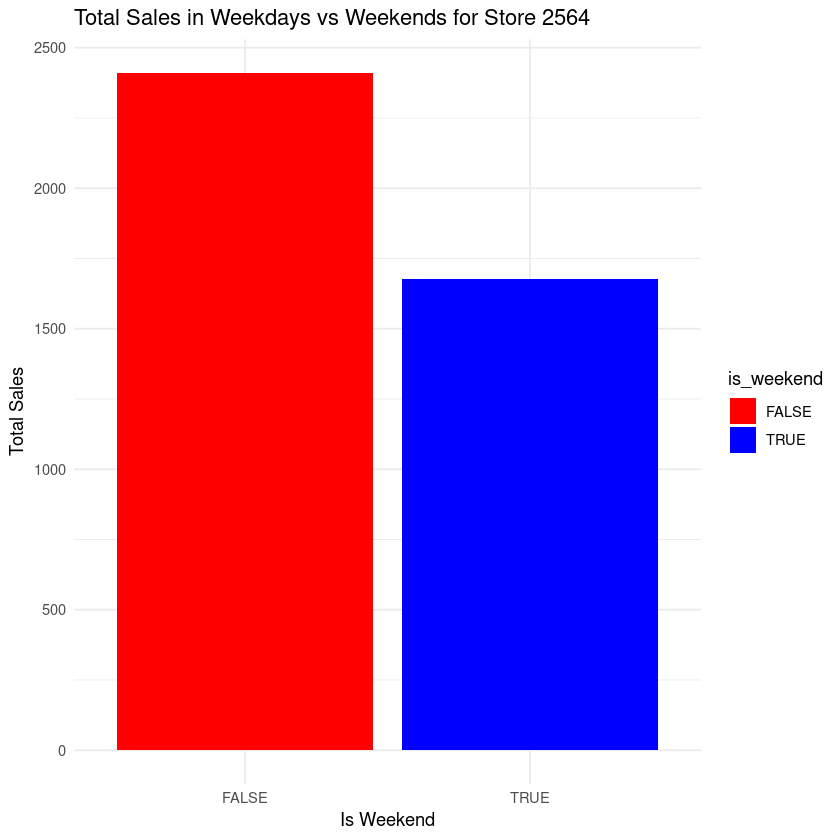

In [21]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Filter data for store 2564
store_2564_data <- train %>%
  filter(store_num == 2564)

# Summarize sales by weekday and weekend
sales_summary <- store_2564_data %>%
  group_by(is_weekend) %>%
  summarize(total_sales = sum(sales_amt, na.rm = TRUE))

# Create a bar plot to visualize sales in weekdays and weekends
ggplot(sales_summary, aes(x = is_weekend, y = total_sales, fill = is_weekend)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Sales in Weekdays vs Weekends for Store 2564",
       x = "Is Weekend",
       y = "Total Sales") +
  scale_fill_manual(values = c("TRUE" = "blue", "FALSE" = "red")) +
  theme_minimal()

In [23]:
# Install the necessary library if not already installed

  install.packages("randomForest")

# Prepare the data for modeling
# Select relevant features and remove rows with missing values
model_data <- store_2564_data %>%
  select(sales_amt, sales_qty, selling_units, actual_sales_prc, total_gross_amt, total_net_amt, total_tax_net_amt, total_tax_sales_amt, sub_total, day_of_week, is_weekend) %>%
  na.omit()

# Convert categorical variables to factors
model_data$day_of_week <- as.factor(model_data$day_of_week)
model_data$is_weekend <- as.factor(model_data$is_weekend)

# Split the data into training and testing sets
set.seed(123)  # For reproducibility
train_indices <- sample(seq_len(nrow(model_data)), size = 0.7 * nrow(model_data))
train_data <- model_data[train_indices, ]
test_data <- model_data[-train_indices, ]

# Train a random forest model to predict sales_amt
rf_model <- randomForest(sales_amt ~ ., data = train_data, ntree = 100)

# Predict on the test set
predictions <- predict(rf_model, newdata = test_data)

# Evaluate the model performance
actuals <- test_data$sales_amt
mse <- mean((predictions - actuals)^2)
rmse <- sqrt(mse)

# Print the RMSE
rmse

Loading required package: randomForest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘randomForest’”


# Downloading packages -------------------------------------------------------
- Downloading randomForest from CRAN ...        OK [212.2 Kb in 0.2s]
Successfully downloaded 1 package in 0.35 seconds.

The following package(s) will be installed:
- randomForest [4.7-1.2]
These packages will be installed into "~/renv/library/R-4.2/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing randomForest ...                   OK [installed binary and cached in 0.51s]


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




[1] 0.3724108

In [24]:
# Print the predictions for the test set for store 2564
predictions

1         3         4         7         9        12        15        17 
 2.796591  5.966775 11.423303  2.310933  3.307719  3.307719  3.477308 12.714048 
       18        22        25        27        28        32        35        42 
 2.799850  2.560219  5.506148  2.806591  2.726371  4.003407  5.937145  2.802717 
       43        44        50        58        60        62        63        66 
 3.312750  2.356567  7.539748  7.608403  6.590582  3.313124  4.778295  3.313124 
       70        73        75        77        82        86        92        93 
 3.486450  4.176313  7.373850  2.801917  3.674613  2.547977  3.289950  7.566617 
       97        99       101       102       107       109       114       123 
 3.470934  9.924940  9.893820  9.901858  8.669462  3.460660  6.644048  3.449414 
      126       133       140       142       144       145       146       147 
 5.549918  2.506480  3.761308  3.997525  2.540982  4.898093  5.555068  3.729764 
      149       150       154       157       172       173       176       182 
 3.972083  2.700567  4.885415  2.778630  4.178880  2.698246  2.801883  3.677802 
      183       192       194       198       208       213       214       215 
 3.677802  9.901943  3.710967  2.788250  7.528408  3.703883  1.976950  2.041994 
      216       230       233       245       247       248       249       253 
 3.280519  3.473320  3.728950  3.331633  4.020392  4.657898  5.224662 12.901363 
      254       256       257       266       269       272       285       293 
 5.494510  7.446548  7.733968  3.276617  3.290400  2.710996  5.445210  2.329979 
      296       298       300       307       312       313       314       318 
 3.258943  4.912932  3.891600  3.285217  2.672667  3.977233  5.993567  2.590697 
      320       324       325       333       335       341       345       350 
 2.831667  2.812603  2.812603  2.371133  3.312183  3.301600  3.679150  3.889550 
      353       354       359       360       361       363       370       372 
 2.774129  3.703708  3.990800  9.986515  4.885502  2.731180  3.895213  5.638845 
      375       380       383       385       387       394       407       408 
 3.961575  3.966490  2.831472  2.762222  5.491133  2.784579  3.289950  5.831365 
      410       411       414       416       419       423       425       432 
 3.700683  3.700683  5.919895  2.520420  7.504282  1.690967  2.830444  3.304815 
      434       436       438       439       440       442       453       454 
 6.495940  5.947812  3.980080  3.980080  3.980080  2.222650  4.160933  2.507090 
      460       467       470       471       472       474       476       481 
 3.942734  5.430980  2.632022  7.397509  8.914017  8.914017  2.779983  5.948450 
      482       485       487       488       489       491       492       495 
 2.748983  3.695750  3.482958 10.149157  6.874253 11.439268  3.991990  3.760640 
      496       497       501       504       512       514       518       521 
 2.785917  2.785917  2.798004  2.489995  3.969567  3.940425  1.943242  2.692463 
      525       529       530       531       532       533       536       541 
 3.996417  9.097935  3.310767  4.010083  5.660938  2.672433  4.187858  3.312317 
      542       546       547       551       556       558       559       561 
 4.096017  6.756568  4.206354  5.548410  5.974800  5.918668  3.310427  9.145888 
      569       570       574       580       586       587       591       592 
 5.838733  4.007999  9.986478  3.522103  7.542580  7.542580  2.705981  3.291650 
      594       604       608       609       616       620       622       624 
 3.454300  3.459877  5.965868  3.681667  3.944250  5.673293  5.626637  2.822004 
      626       628       630       635       637       638       641       644 
 4.185865 14.224345  5.753142  8.693098  2.856472  4.241292  2.808983 12.072325 
      650       651       652       654       659       664       667       669 
 2.789897  9.839627  4.165867  3.977157

In [11]:
# Load necessary libraries
library(caret)
library(randomForest)

# Set seed for reproducibility
set.seed(123)

# Prepare future data for prediction
# Assuming future_data is a dataframe with the same structure as trainData but without the sales_amt column
# Example of future_data creation (this should be replaced with actual future data)
future_data <- data.frame(
  year = c(2023, 2023, 2023),
  month = c(10, 11, 12),
  day = c(1, 1, 1),
  sales_per_unit = c(5.5, 6.0, 5.8),
  total_tax_amt = c(0.5, 0.6, 0.55),
  discount_amt = c(0.1, 0.2, 0.15),
  day_of_week = c("Monday", "Wednesday", "Friday"),
  is_weekend = c(FALSE, FALSE, FALSE)
)

# Predict future sales
future_predictions <- predict(rf_model, newdata = future_data)

# Display future predictions
future_predictions

1        2        3 
5.403515 5.676532 5.530254